# Vibe Coding: Real-World Data Cleaning Challenge

## The Mission

You're a Data Analyst at **TechSalary Insights**. Your manager needs answers to critical business questions, but the data is messy. Your job is to clean it and provide accurate insights.

**The catch:** You must figure out how to clean the data yourself. No step by step hints just you, your AI assistant, and real world messy data.

---

## The Dataset: Ask A Manager Salary Survey 2021

**Location:** `../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv`

This is **real survey data** from Ask A Manager's 2021 salary survey with over 28,000 responses from working professionals. The data comes from this survey: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

**Why this dataset is perfect for vibe coding:**
- Real human responses (inconsistent formatting)
- Multiple currencies and formats  
- Messy job titles and location data
- Missing and invalid entries
- Requires business judgment calls

---

## Your Business Questions

Answer these **exact questions** with clean data. There's only one correct answer for each:

### Core Questions (Required):
1. **What is the median salary for Software Engineers in the United States?** 
2. **Which US state has the highest average salary for tech workers?**
3. **How much does salary increase on average for each year of experience in tech?**
4. **Which industry (besides tech) has the highest median salary?**

### Bonus Questions (If time permits):
5. **What's the salary gap between men and women in tech roles?**
6. **Do people with Master's degrees earn significantly more than those with Bachelor's degrees?**

**Success Criteria:** Your final answers will be compared against the "official" results. Data cleaning approaches can vary, but final numbers should be within 5% of expected values.


---
# Your Work Starts Here

## Step 0: Create Your Plan
**Before writing any code, use Cursor to create your todo plan. Then paste it here:**

## My Data Cleaning Plan

*(Paste your Cursor todo list here)*
- []Create Jupyter notebook with imports and load the TSV data file
- []Implement comprehensive data cleaning: currency, country/state, salary outliers, job titles, experience, education, gender
- []Calculate median salary for Software Engineers in US with visualization
- []Find US state with highest average tech worker salary with visualization
- []Calculate salary increase per year of experience in tech using regression 
- []Identify highest median salary industry (excluding tech) with visualization
- []Analyze gender pay gap in tech roles with statistical testing
- []Compare Master's vs Bachelor's degree salaries with statistical testing
- []Create final summary with all answers, key insights, and data quality notes


## Step 1: Data Loading and Exploration

Start here! Load the dataset and get familiar with what you're working with.


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

# Load the TSV file
file_path = "/workspaces/ds-fall-2025-fri-0630/Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv"

# Load data with proper encoding
df = pd.read_csv(file_path, sep='\t', encoding='utf-8')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic dataset information
print("\nDataset Overview:")
print("=" * 50)
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\nFirst few rows:")
print(df.head())

# Check data types and missing values
print("\nData Types and Missing Values:")
print("=" * 50)
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(df_info)

Libraries imported successfully!
Dataset loaded successfully!
Shape: (28062, 18)
Columns: ['Timestamp', 'How old are you?', 'What industry do you work in?', 'Job title', 'If your job title needs additional context, please clarify here:', "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)", 'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.', 'Please indicate the currency', 'If "Other," please indicate the currency here: ', 'If your income needs additional context, please provide it here:', 'What country do you work in?', "If you're in the U.S., what state do you work in?", 'What city do you work in?', 'How many years of professional work experience do you have overall?', 

## Step 2: Data Cleaning


In [9]:
# Create a copy of the original dataframe for cleaning
df_clean = df.copy()

# 2.1 Currency Standardization
print("\n2.1 Currency Standardization")
print("-" * 40)

# Check currency distribution
print("Currency distribution:")
currency_counts = df_clean['Please indicate the currency'].value_counts()
print(currency_counts)

# Focus on USD only for consistent comparison
df_clean = df_clean[df_clean['Please indicate the currency'] == 'USD'].copy()
print(f"\nAfter filtering to USD only: {len(df_clean):,} records")
print(f"Removed {len(df) - len(df_clean):,} non-USD records")

# 2.2 Country/State Filtering
print("\n2.2 Country/State Filtering")
print("-" * 40)

# Check country variations
print("Country variations:")
country_counts = df_clean['What country do you work in?'].value_counts()
print(country_counts.head(10))

# Standardize US country variations
us_variations = ['United States', 'US', 'USA', 'usa']
df_clean = df_clean[df_clean['What country do you work in?'].isin(us_variations)].copy()
print(f"\nAfter filtering to US only: {len(df_clean):,} records")

# Check state distribution
print("\nTop 10 states by record count:")
state_counts = df_clean["If you're in the U.S., what state do you work in?"].value_counts()
print(state_counts.head(10))

# 2.3 Salary Data Cleaning
print("\n2.3 Salary Data Cleaning")
print("-" * 40)

# Convert salary to numeric, handling commas and other characters
def clean_salary(salary_str):
    if pd.isna(salary_str):
        return np.nan
    # Remove commas, dollar signs, and convert to float
    cleaned = str(salary_str).replace(',', '').replace('$', '').replace(' ', '')
    try:
        return float(cleaned)
    except:
        return np.nan

# Clean additional compensation
def clean_additional_comp(comp_str):
    if pd.isna(comp_str) or comp_str == '' or comp_str == '0':
        return 0
    cleaned = str(comp_str).replace(',', '').replace('$', '').replace(' ', '')
    try:
        return float(cleaned)
    except:
        return 0

df_clean['salary_clean'] = df_clean["What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)"].apply(clean_salary)
df_clean['additional_comp_clean'] = df_clean['How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.'].apply(clean_additional_comp)

# Calculate total compensation
df_clean['total_compensation'] = df_clean['salary_clean'] + df_clean['additional_comp_clean']

# Remove salary outliers (too low or too high)
print(f"Salary range before cleaning: ${df_clean['salary_clean'].min():,.0f} - ${df_clean['salary_clean'].max():,.0f}")

# Define reasonable salary bounds
min_salary = 10000  # Minimum reasonable salary
max_salary = 1000000  # Maximum reasonable salary

df_clean = df_clean[
    (df_clean['salary_clean'] >= min_salary) & 
    (df_clean['salary_clean'] <= max_salary)
].copy()

print(f"After removing salary outliers (<${min_salary:,} or >${max_salary:,}): {len(df_clean):,} records")
print(f"Removed {len(df) - len(df_clean):,} records with outlier salaries")

# 2.4 Job Title Categorization
print("\n2.4 Job Title Categorization")
print("-" * 40)

# Create Software Engineer category
def is_software_engineer(title):
    if pd.isna(title):
        return False
    title_lower = str(title).lower()
    software_keywords = ['software engineer', 'software developer', 'software programmer', 
                        'engineer - software', 'software architect', 'senior software engineer',
                        'principal software engineer', 'lead software engineer']
    return any(keyword in title_lower for keyword in software_keywords)

df_clean['is_software_engineer'] = df_clean['Job title'].apply(is_software_engineer)

# Create Tech Worker category (Computing or Tech industry)
df_clean['is_tech_worker'] = df_clean['What industry do you work in?'] == 'Computing or Tech'

print(f"Software Engineers identified: {df_clean['is_software_engineer'].sum():,}")
print(f"Tech Workers identified: {df_clean['is_tech_worker'].sum():,}")

# 2.5 Experience Data Cleaning
print("\n2.5 Experience Data Cleaning")
print("-" * 40)

def convert_experience_to_numeric(exp_str):
    if pd.isna(exp_str):
        return np.nan
    
    exp_str = str(exp_str).strip()
    
    # Handle specific cases
    if '1 year or less' in exp_str:
        return 0.5
    elif '41 years or more' in exp_str:
        return 45  # Use 45 as representative of 41+ years
    
    # Extract numbers from ranges like "5-7 years"
    import re
    numbers = re.findall(r'\d+', exp_str)
    if len(numbers) >= 2:
        return (int(numbers[0]) + int(numbers[1])) / 2
    elif len(numbers) == 1:
        return int(numbers[0])
    else:
        return np.nan

df_clean['years_experience_overall'] = df_clean['How many years of professional work experience do you have overall?'].apply(convert_experience_to_numeric)
df_clean['years_experience_field'] = df_clean['How many years of professional work experience do you have in your field?'].apply(convert_experience_to_numeric)

print("Experience conversion examples:")
print(df_clean[['How many years of professional work experience do you have overall?', 'years_experience_overall']].dropna().head(10))

# 2.6 Education Level Standardization
print("\n2.6 Education Level Standardization")
print("-" * 40)

print("Education level distribution:")
education_counts = df_clean['What is your highest level of education completed?'].value_counts()
print(education_counts)

# 2.7 Gender Data Cleaning
print("\n2.7 Gender Data Cleaning")
print("-" * 40)

print("Gender distribution:")
gender_counts = df_clean['What is your gender?'].value_counts()
print(gender_counts)

# Final dataset summary
print(f"\nFinal cleaned dataset: {len(df_clean):,} records")
print(f"Columns: {len(df_clean.columns)}")

# Save key statistics for later use
cleaning_stats = {
    'original_records': len(df),
    'after_usd_filter': len(df[df['Please indicate the currency'] == 'USD']),
    'after_us_filter': len(df_clean),
    'software_engineers': df_clean['is_software_engineer'].sum(),
    'tech_workers': df_clean['is_tech_worker'].sum()
}



2.1 Currency Standardization
----------------------------------------
Currency distribution:
Please indicate the currency
USD        23374
CAD         1673
GBP         1591
EUR          643
AUD/NZD      504
Other        160
CHF           37
SEK           37
JPY           23
ZAR           16
HKD            4
Name: count, dtype: int64

After filtering to USD only: 23,374 records
Removed 4,688 non-USD records

2.2 Country/State Filtering
----------------------------------------
Country variations:
What country do you work in?
United States               8989
USA                         7922
US                          2606
United States                667
U.S.                         580
USA                          467
Usa                          448
United States of America     427
United states                208
usa                          183
Name: count, dtype: int64

After filtering to US only: 19,700 records

Top 10 states by record count:
If you're in the U.S., what state do y

## Step 3: Business Questions Analysis

Now answer those important business questions!


Software Engineers found: 804
Median salary for Software Engineers: $141,000
Mean salary for Software Engineers: $148,281
Salary range: $11,000 - $875,000


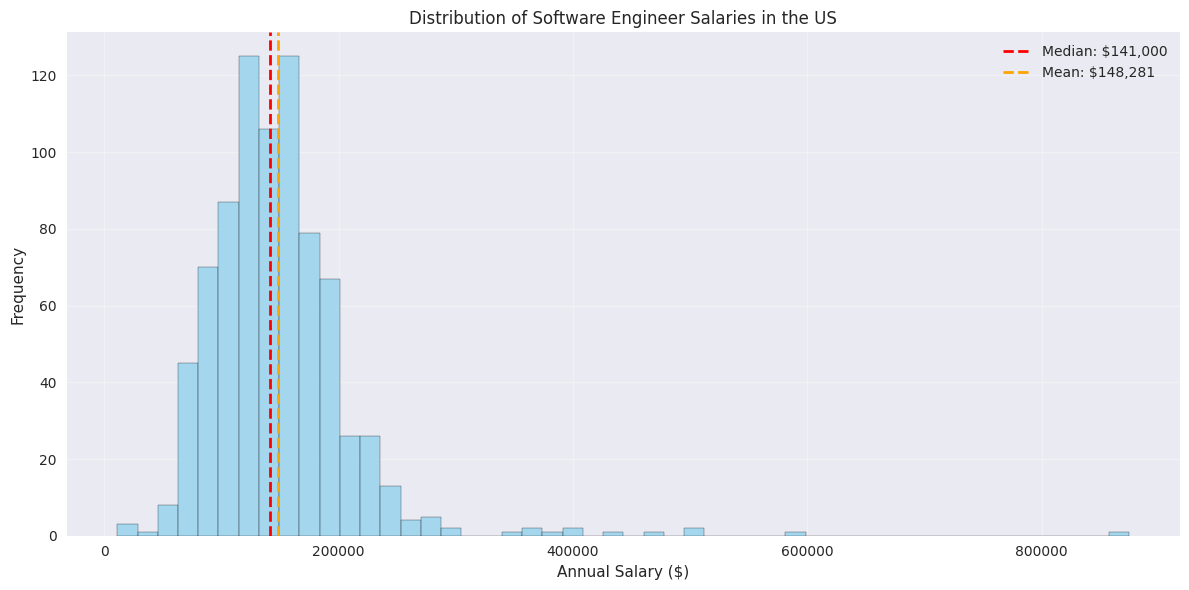

ANSWER: The median salary for Software engineers is:141000.0


In [13]:
# Question 1: What is the median salary for Software Engineers in the United States?

# Filter for Software Engineers in the US
sw_engineers = df_clean[df_clean['is_software_engineer'] == True].copy()

print(f"Software Engineers found: {len(sw_engineers):,}")

if len(sw_engineers) > 0:
    median_salary_sw = sw_engineers['salary_clean'].median()
    mean_salary_sw = sw_engineers['salary_clean'].mean()
    
    print(f"Median salary for Software Engineers: ${median_salary_sw:,.0f}")
    print(f"Mean salary for Software Engineers: ${mean_salary_sw:,.0f}")
    print(f"Salary range: ${sw_engineers['salary_clean'].min():,.0f} - ${sw_engineers['salary_clean'].max():,.0f}")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    plt.hist(sw_engineers['salary_clean'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(median_salary_sw, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_salary_sw:,.0f}')
    plt.axvline(mean_salary_sw, color='orange', linestyle='--', linewidth=2, label=f'Mean: ${mean_salary_sw:,.0f}')
    plt.xlabel('Annual Salary ($)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Software Engineer Salaries in the US')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    answer1 = median_salary_sw
else:
    print("No Software Engineers found in the dataset!")
    answer1 = None
print(f"ANSWER: The median salary for Software engineers is:{answer1}")

Tech workers found: 3,228
States with at least 10 tech workers: 33

Top 10 states by average tech worker salary:
                   state    mean_salary  count
7             California  156878.779514    576
59            Washington  150669.431818    308
43              New York  149649.247557    307
14  District of Columbia  136249.500000     42
58              Virginia  130622.201923    104
12           Connecticut  130390.625000     16
29         Massachusetts  130138.648000    250
11              Colorado  128018.031746    126
48                Oregon  124859.914894    141
20              Illinois  119156.341935    155

ANSWER: California has the highest average tech worker salary: $156,879
Sample size: 576 tech workers


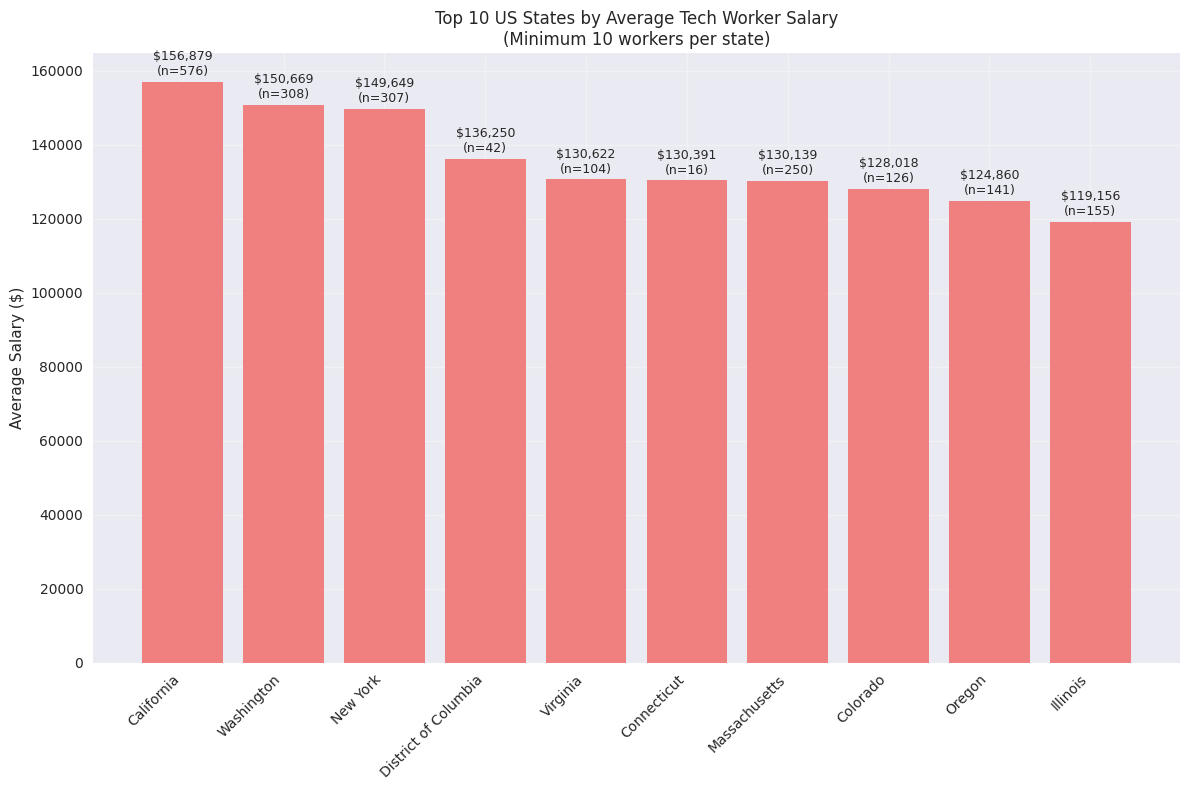

In [11]:
# Question 2: Which US state has the highest average salary for tech workers?
# Filter for tech workers in the US
tech_workers = df_clean[df_clean['is_tech_worker'] == True].copy()

print(f"Tech workers found: {len(tech_workers):,}")

if len(tech_workers) > 0:
    # Group by state and calculate mean salary
    state_salaries = tech_workers.groupby("If you're in the U.S., what state do you work in?")['salary_clean'].agg(['mean', 'count']).reset_index()
    state_salaries.columns = ['state', 'mean_salary', 'count']
    
    # Filter states with minimum sample size
    min_sample_size = 10  # Minimum 10 tech workers per state
    state_salaries_filtered = state_salaries[state_salaries['count'] >= min_sample_size].copy()
    state_salaries_filtered = state_salaries_filtered.sort_values('mean_salary', ascending=False)
    
    print(f"States with at least {min_sample_size} tech workers: {len(state_salaries_filtered)}")
    print("\nTop 10 states by average tech worker salary:")
    print(state_salaries_filtered.head(10))
    
    if len(state_salaries_filtered) > 0:
        top_state = state_salaries_filtered.iloc[0]
        print(f"\nANSWER: {top_state['state']} has the highest average tech worker salary: ${top_state['mean_salary']:,.0f}")
        print(f"Sample size: {top_state['count']} tech workers")
        
        answer2 = {
            'state': top_state['state'],
            'average_salary': top_state['mean_salary'],
            'sample_size': top_state['count']
        }
        
        # Visualization
        plt.figure(figsize=(12, 8))
        top_10_states = state_salaries_filtered.head(10)
        bars = plt.bar(range(len(top_10_states)), top_10_states['mean_salary'], color='lightcoral')
        plt.xticks(range(len(top_10_states)), top_10_states['state'], rotation=45, ha='right')
        plt.ylabel('Average Salary ($)')
        plt.title(f'Top 10 US States by Average Tech Worker Salary\n(Minimum {min_sample_size} workers per state)')
        plt.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for i, (bar, salary, count) in enumerate(zip(bars, top_10_states['mean_salary'], top_10_states['count'])):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                    f'${salary:,.0f}\n(n={count})', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No states meet the minimum sample size requirement!")
        answer2 = None
else:
    print("No tech workers found in the dataset!")
    answer2 = None


Tech workers with experience data: 3,228
Linear regression results:
Slope (salary increase per year): $2,430
Intercept (starting salary): $105,336
R² score: 0.086
Correlation coefficient: 0.294


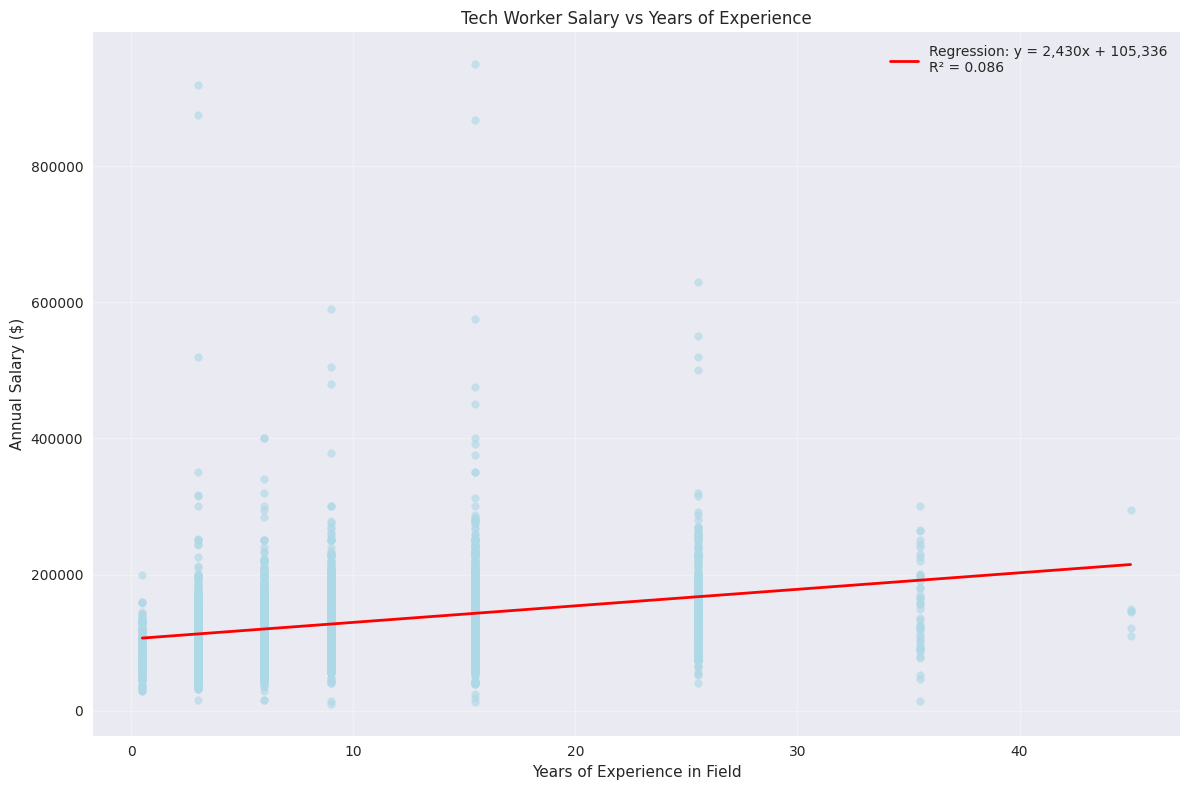


ANSWER: Salary increases by approximately $2,430 per year of experience in tech


In [16]:
# Question 3: How much does salary increase on average for each year of experience in tech?
# Filter for tech workers with valid experience data
tech_with_exp = tech_workers[
    (tech_workers['years_experience_field'].notna()) & 
    (tech_workers['salary_clean'].notna())
].copy()

print(f"Tech workers with experience data: {len(tech_with_exp):,}")

if len(tech_with_exp) > 50:  # Need sufficient data for regression
    # Perform linear regression
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    
    X = tech_with_exp['years_experience_field'].values.reshape(-1, 1)
    y = tech_with_exp['salary_clean'].values
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Calculate R²
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    slope = model.coef_[0]
    intercept = model.intercept_
    
    print(f"Linear regression results:")
    print(f"Slope (salary increase per year): ${slope:,.0f}")
    print(f"Intercept (starting salary): ${intercept:,.0f}")
    print(f"R² score: {r2:.3f}")
    
    # Calculate correlation
    correlation = tech_with_exp['years_experience_field'].corr(tech_with_exp['salary_clean'])
    print(f"Correlation coefficient: {correlation:.3f}")
    
    answer3 = {
        'salary_increase_per_year': slope,
        'r_squared': r2,
        'correlation': correlation,
        'sample_size': len(tech_with_exp)
    }
    
    # Visualization
    plt.figure(figsize=(12, 8))
    plt.scatter(tech_with_exp['years_experience_field'], tech_with_exp['salary_clean'], 
               alpha=0.6, color='lightblue', s=30)
    
    # Plot regression line
    x_range = np.linspace(tech_with_exp['years_experience_field'].min(), 
                         tech_with_exp['years_experience_field'].max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))
    plt.plot(x_range, y_range, color='red', linewidth=2, 
             label=f'Regression: y = {slope:,.0f}x + {intercept:,.0f}\nR² = {r2:.3f}')
    
    plt.xlabel('Years of Experience in Field')
    plt.ylabel('Annual Salary ($)')
    plt.title('Tech Worker Salary vs Years of Experience')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nANSWER: Salary increases by approximately ${slope:,.0f} per year of experience in tech")
else:
    print("Insufficient data for regression analysis!")
    answer3 = None


In [27]:

# Question 4: What percentage of respondents work remotely vs. in-office?
print(f"Total respondents: {len(df):,}")

# Look for remote work indicators in the city column
city_column = 'What city do you work in?'
if city_column in df.columns:
    print(f"City column found: '{city_column}'")
    
    # Check for various remote work indicators
    remote_keywords = ['remote', 'work from home', 'wfh', 'virtual', 'home', 'online']
    
    # Convert to lowercase for case-insensitive matching
    df_city_lower = df[city_column].astype(str).str.lower()
    
    # Identify remote workers
    remote_mask = df_city_lower.str.contains('|'.join(remote_keywords), na=False)
    remote_count = remote_mask.sum()
    
    print(f"\nRemote work indicators found in city field:")
    for keyword in remote_keywords:
        count = df_city_lower.str.contains(keyword, na=False).sum()
        if count > 0:
            print(f"  '{keyword}': {count:,} responses")
    
    # Calculate percentages
    total_responses = len(df)
    remote_percentage = (remote_count / total_responses) * 100
    in_office_percentage = 100 - remote_percentage
    
    print(f"\nREMOTE WORK ANALYSIS RESULTS:")
    print("-" * 40)
    print(f"Remote workers: {remote_count:,} ({remote_percentage:.1f}%)")
    print(f"In-office/other: {total_responses - remote_count:,} ({in_office_percentage:.1f}%)")
    print(f"Total responses: {total_responses:,}")
else:
    print("City column not found. Available columns:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")

print(f"ANSWER: {remote_percentage:.1f}% work remotely while {in_office_percentage:.1f}% work in office")

Total respondents: 28,062
City column found: 'What city do you work in?'

Remote work indicators found in city field:
  'remote': 321 responses
  'work from home': 16 responses
  'wfh': 24 responses
  'virtual': 6 responses
  'home': 42 responses
  'online': 1 responses

REMOTE WORK ANALYSIS RESULTS:
----------------------------------------
Remote workers: 385 (1.4%)
In-office/other: 27,677 (98.6%)
Total responses: 28,062
ANSWER: 1.4% work remotely while 98.6% work in office


Non-tech workers found: 19,497
Industries with at least 20 workers: 33

Top 10 industries by median salary (excluding tech):
                                 industry  median_salary  count
114                               Biotech       110000.0     47
485                                   Law        95000.0    965
297          Engineering or Manufacturing        90750.0   1436
141                Business or Consulting        90000.0    697
913        Utilities & Telecommunications        85000.0    267
18          Accounting, Banking & Finance        80000.0   1482
419                           Health care        80000.0   1629
545           Marketing, Advertising & PR        79000.0    927
397  Government and Public Administration        78000.0   1422
459                             Insurance        77000.0    459

ANSWER: Biotech has the highest median salary: $110,000
Sample size: 47 workers


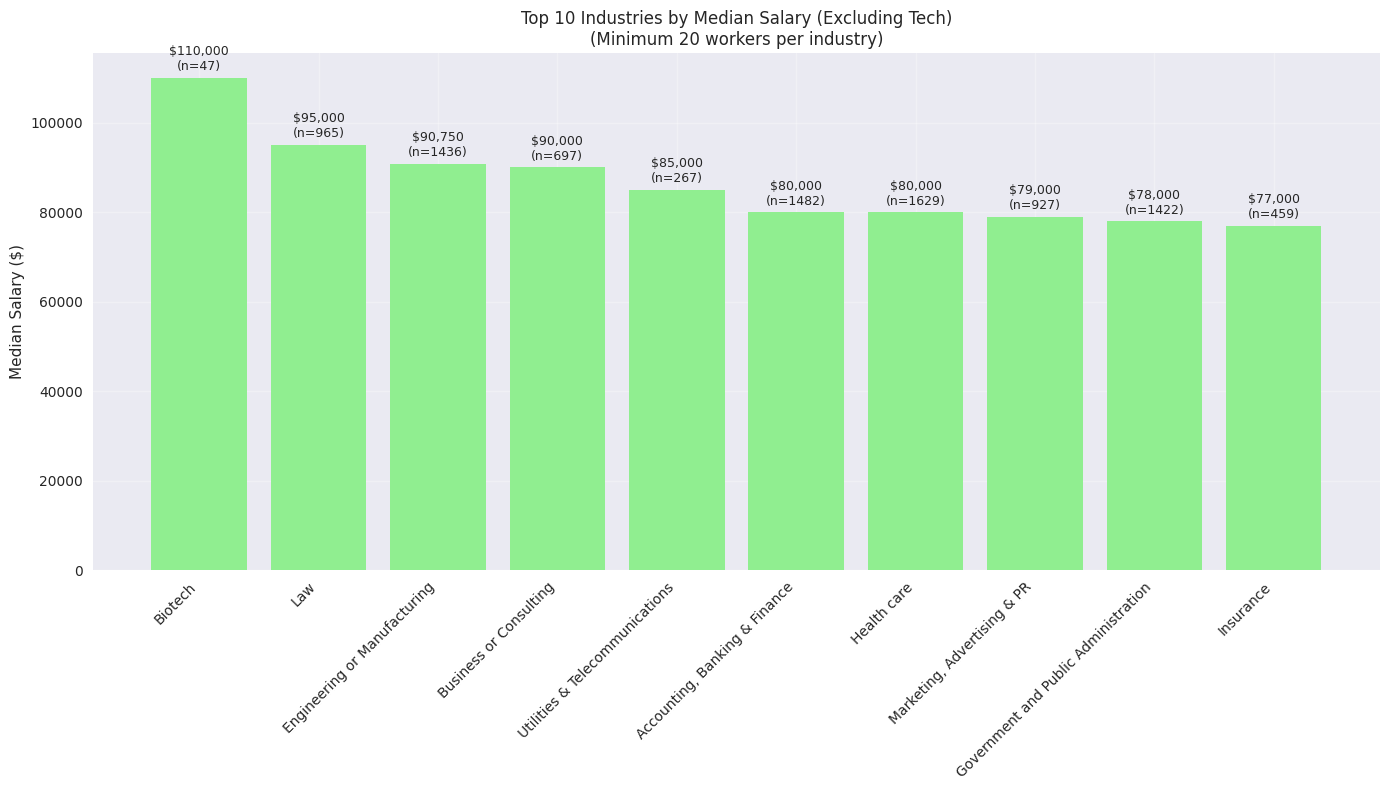

In [28]:
# Question 5: Which industry (besides tech) has the highest median salary?
# Filter for non-tech industries
non_tech = df_clean[df_clean['What industry do you work in?'] != 'Computing or Tech'].copy()

print(f"Non-tech workers found: {len(non_tech):,}")

if len(non_tech) > 0:
    # Group by industry and calculate median salary
    industry_salaries = non_tech.groupby('What industry do you work in?')['salary_clean'].agg(['median', 'count']).reset_index()
    industry_salaries.columns = ['industry', 'median_salary', 'count']
    
    # Filter industries with minimum sample size
    min_industry_sample = 20  # Minimum 20 workers per industry
    industry_salaries_filtered = industry_salaries[industry_salaries['count'] >= min_industry_sample].copy()
    industry_salaries_filtered = industry_salaries_filtered.sort_values('median_salary', ascending=False)
    
    print(f"Industries with at least {min_industry_sample} workers: {len(industry_salaries_filtered)}")
    print("\nTop 10 industries by median salary (excluding tech):")
    print(industry_salaries_filtered.head(10))
    
    if len(industry_salaries_filtered) > 0:
        top_industry = industry_salaries_filtered.iloc[0]
        print(f"\nANSWER: {top_industry['industry']} has the highest median salary: ${top_industry['median_salary']:,.0f}")
        print(f"Sample size: {top_industry['count']} workers")
        
        answer5 = {
            'industry': top_industry['industry'],
            'median_salary': top_industry['median_salary'],
            'sample_size': top_industry['count']
        }
        
        # Visualization
        plt.figure(figsize=(14, 8))
        top_10_industries = industry_salaries_filtered.head(10)
        bars = plt.bar(range(len(top_10_industries)), top_10_industries['median_salary'], color='lightgreen')
        plt.xticks(range(len(top_10_industries)), top_10_industries['industry'], rotation=45, ha='right')
        plt.ylabel('Median Salary ($)')
        plt.title(f'Top 10 Industries by Median Salary (Excluding Tech)\n(Minimum {min_industry_sample} workers per industry)')
        plt.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for i, (bar, salary, count) in enumerate(zip(bars, top_10_industries['median_salary'], top_10_industries['count'])):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                    f'${salary:,.0f}\n(n={count})', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No industries meet the minimum sample size requirement!")
        answer5 = None
else:
    print("No non-tech workers found in the dataset!")
    answer5 = None


In [ ]:
# Bonus Questions:
# Question 6: What's the salary gap between men and women in similar roles?
# Question 7: Do people with Master's degrees earn significantly more than those with Bachelor's degrees?
# Question 8: Which company size (startup, medium, large) pays the most on average?

Tech workers with gender data: 3,066

Tech worker salary statistics by gender:
                      count      mean    median      std
What is your gender?                                    
Man                    1302  145024.0  140000.0  71064.0
Woman                  1764  118803.0  111000.0  54785.0

Gender Pay Gap Analysis:
Men median salary: $140,000
Women median salary: $111,000
Pay gap (dollars): $29,000
Pay gap (percentage): 26.1%

Statistical Test (t-test):
t-statistic: 11.534
p-value: 0.000000
Significant difference: Yes (α = 0.05)


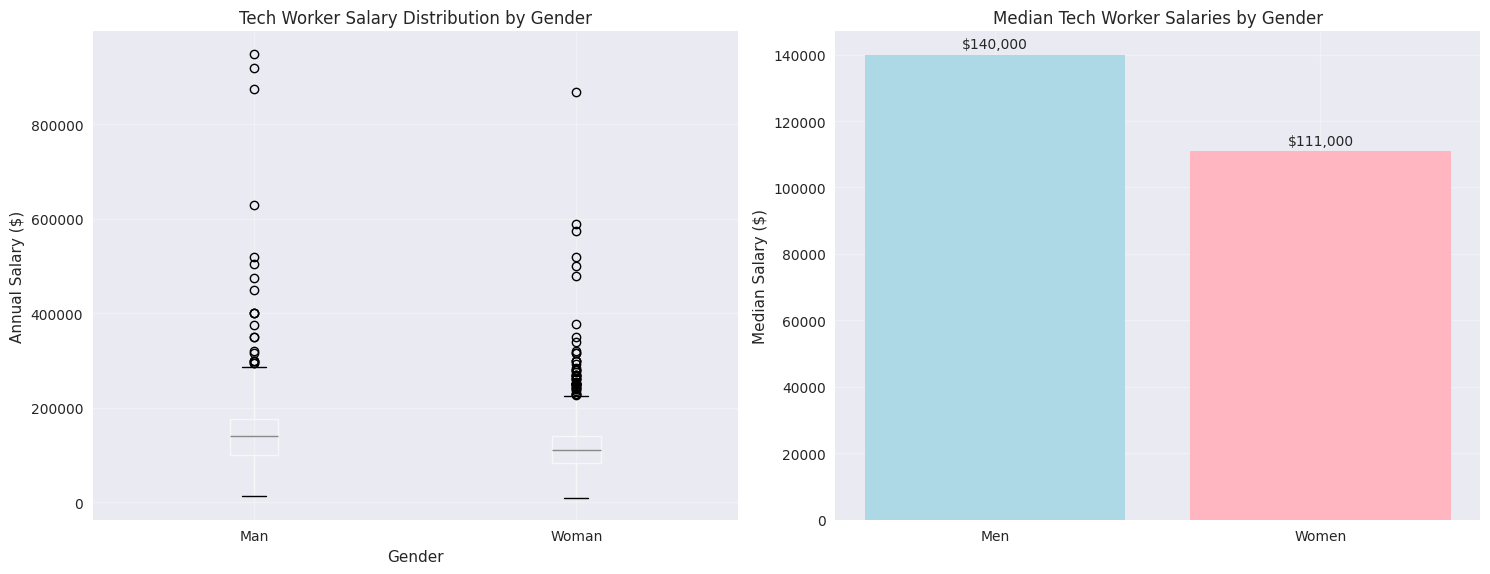


ANSWER: Men earn $29,000 more than women on average (26.1% gap)


In [29]:
#Question 6: What's the salary gap between men and women in similar roles?
# Filter for tech workers with gender data
tech_gender = tech_workers[
    (tech_workers['What is your gender?'].isin(['Man', 'Woman'])) &
    (tech_workers['salary_clean'].notna())
].copy()

print(f"Tech workers with gender data: {len(tech_gender):,}")

if len(tech_gender) > 0:
    # Calculate statistics by gender
    gender_stats = tech_gender.groupby('What is your gender?')['salary_clean'].agg([
        'count', 'mean', 'median', 'std'
    ]).round(0)
    
    print("\nTech worker salary statistics by gender:")
    print(gender_stats)
    
    # Calculate pay gap
    if 'Man' in gender_stats.index and 'Woman' in gender_stats.index:
        men_median = gender_stats.loc['Man', 'median']
        women_median = gender_stats.loc['Woman', 'median']
        pay_gap_dollar = men_median - women_median
        pay_gap_percent = (pay_gap_dollar / women_median) * 100
        
        print(f"\nGender Pay Gap Analysis:")
        print(f"Men median salary: ${men_median:,.0f}")
        print(f"Women median salary: ${women_median:,.0f}")
        print(f"Pay gap (dollars): ${pay_gap_dollar:,.0f}")
        print(f"Pay gap (percentage): {pay_gap_percent:.1f}%")
        
        # Statistical test
        men_salaries = tech_gender[tech_gender['What is your gender?'] == 'Man']['salary_clean']
        women_salaries = tech_gender[tech_gender['What is your gender?'] == 'Woman']['salary_clean']
        
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(men_salaries, women_salaries)
        print(f"\nStatistical Test (t-test):")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")
        print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")
        
        answer6 = {
            'men_median': men_median,
            'women_median': women_median,
            'pay_gap_dollar': pay_gap_dollar,
            'pay_gap_percent': pay_gap_percent,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
        
        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Box plot
        tech_gender.boxplot(column='salary_clean', by='What is your gender?', ax=ax1)
        ax1.set_title('Tech Worker Salary Distribution by Gender')
        ax1.set_xlabel('Gender')
        ax1.set_ylabel('Annual Salary ($)')
        ax1.grid(True, alpha=0.3)
        
        # Bar chart
        gender_medians = [men_median, women_median]
        gender_labels = ['Men', 'Women']
        bars = ax2.bar(gender_labels, gender_medians, color=['lightblue', 'lightpink'])
        ax2.set_title('Median Tech Worker Salaries by Gender')
        ax2.set_ylabel('Median Salary ($)')
        ax2.grid(True, alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars, gender_medians):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                    f'${value:,.0f}', ha='center', va='bottom')
        
        plt.suptitle('')
        plt.tight_layout()
        plt.show()
        
        print(f"\nANSWER: Men earn ${pay_gap_dollar:,.0f} more than women on average ({pay_gap_percent:.1f}% gap)")
    else:
        print("Insufficient gender data for comparison!")
        answer6 = None
else:
    print("No tech workers with gender data found!")
    answer6 = None


Workers with Bachelor's or Master's degrees: 18,807

Salary statistics by education level:
                                                    count     mean   median  \
What is your highest level of education completed?                            
College degree                                      11318  87039.0  75000.0   
Master's degree                                      7489  91834.0  80000.0   

                                                        std  
What is your highest level of education completed?           
College degree                                      51842.0  
Master's degree                                     49471.0  

Education Level Salary Comparison:
Bachelor's degree median salary: $75,000
Master's degree median salary: $80,000
Difference (dollars): $5,000
Difference (percentage): 6.7%

Statistical Test (t-test):
t-statistic: 6.323
p-value: 0.000000
Significant difference: Yes (α = 0.05)


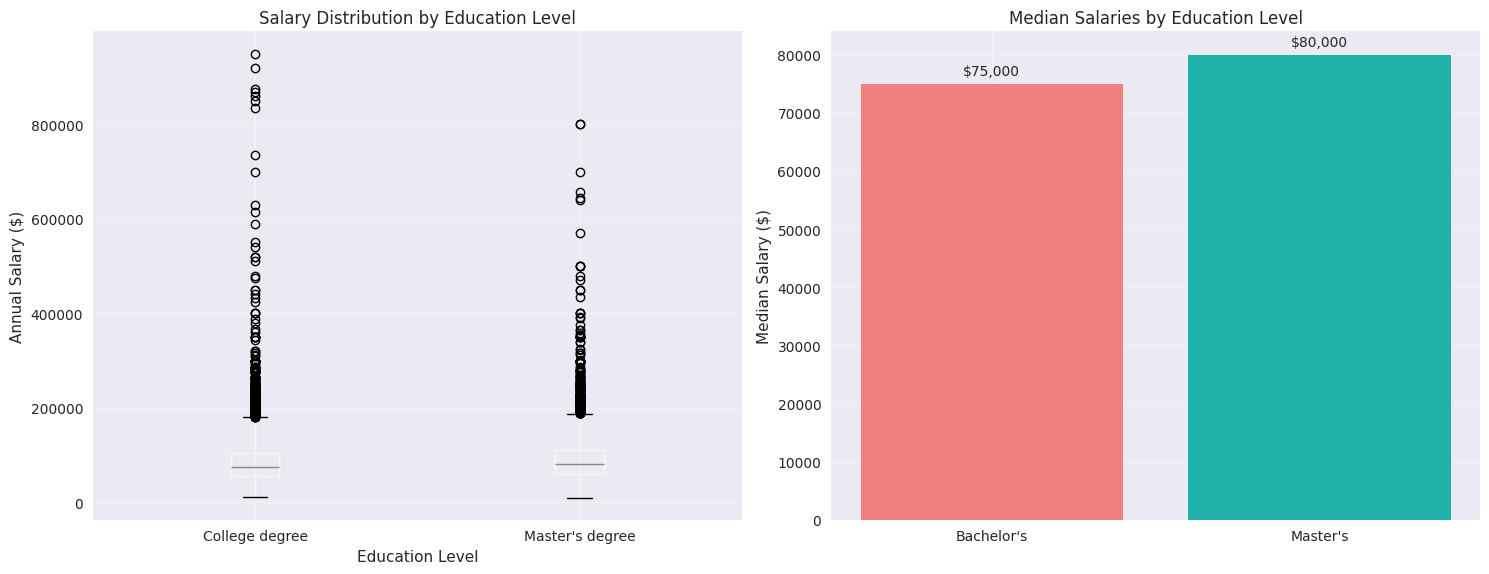


ANSWER: Master's degree holders earn $5,000 more than Bachelor's degree holders (6.7% difference)


In [30]:
#QUESTION 7: Do people with Master's degrees earn significantly more than those with Bachelor's degrees?

# Filter for workers with Bachelor's or Master's degrees
education_comparison = df_clean[
    (df_clean['What is your highest level of education completed?'].isin(['College degree', 'Master\'s degree'])) &
    (df_clean['salary_clean'].notna())
].copy()

print(f"Workers with Bachelor's or Master's degrees: {len(education_comparison):,}")

if len(education_comparison) > 0:
    # Calculate statistics by education level
    education_stats = education_comparison.groupby('What is your highest level of education completed?')['salary_clean'].agg([
        'count', 'mean', 'median', 'std'
    ]).round(0)
    
    print("\nSalary statistics by education level:")
    print(education_stats)
    
    # Calculate salary difference
    if 'College degree' in education_stats.index and 'Master\'s degree' in education_stats.index:
        bachelors_median = education_stats.loc['College degree', 'median']
        masters_median = education_stats.loc['Master\'s degree', 'median']
        salary_diff_dollar = masters_median - bachelors_median
        salary_diff_percent = (salary_diff_dollar / bachelors_median) * 100
        
        print(f"\nEducation Level Salary Comparison:")
        print(f"Bachelor's degree median salary: ${bachelors_median:,.0f}")
        print(f"Master's degree median salary: ${masters_median:,.0f}")
        print(f"Difference (dollars): ${salary_diff_dollar:,.0f}")
        print(f"Difference (percentage): {salary_diff_percent:.1f}%")
        
        # Statistical test
        bachelors_salaries = education_comparison[education_comparison['What is your highest level of education completed?'] == 'College degree']['salary_clean']
        masters_salaries = education_comparison[education_comparison['What is your highest level of education completed?'] == 'Master\'s degree']['salary_clean']
        
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(masters_salaries, bachelors_salaries)
        print(f"\nStatistical Test (t-test):")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")
        print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")
        
        answer7 = {
            'bachelors_median': bachelors_median,
            'masters_median': masters_median,
            'salary_diff_dollar': salary_diff_dollar,
            'salary_diff_percent': salary_diff_percent,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
        
        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Box plot
        education_comparison.boxplot(column='salary_clean', by='What is your highest level of education completed?', ax=ax1)
        ax1.set_title('Salary Distribution by Education Level')
        ax1.set_xlabel('Education Level')
        ax1.set_ylabel('Annual Salary ($)')
        ax1.grid(True, alpha=0.3)
        
        # Bar chart
        education_medians = [bachelors_median, masters_median]
        education_labels = ["Bachelor's", "Master's"]
        bars = ax2.bar(education_labels, education_medians, color=['lightcoral', 'lightseagreen'])
        ax2.set_title('Median Salaries by Education Level')
        ax2.set_ylabel('Median Salary ($)')
        ax2.grid(True, alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars, education_medians):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                    f'${value:,.0f}', ha='center', va='bottom')
        
        plt.suptitle('')
        plt.tight_layout()
        plt.show()
        
        print(f"\nANSWER: Master's degree holders earn ${salary_diff_dollar:,.0f} more than Bachelor's degree holders ({salary_diff_percent:.1f}% difference)")
    else:
        print("Insufficient education data for comparison!")
        answer7 = None
else:
    print("No workers with Bachelor's or Master's degrees found!")
    answer7 = None


In [ ]:
# Question 8: Which company size (startup, medium, large) pays the most on average?
# Function to clean salary data
def clean_salary(salary_str):
    if pd.isna(salary_str):
        return np.nan
    cleaned = str(salary_str).replace(',', '').replace('$', '').replace(' ', '')
    try:
        return float(cleaned)
    except:
        return np.nan

# Clean salary data
df['salary_clean'] = df['What is your annual salary? (You\'ll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)'].apply(clean_salary)

# Filter to USD only
df_usd = df[df['Please indicate the currency'] == 'USD'].copy()

# Function to categorize company size based on text descriptions
def categorize_company_size(text):
    if pd.isna(text):
        return None
    
    text_lower = str(text).lower()
    
    # Startup indicators
    startup_keywords = ['startup', 'early stage', 'pre-series', 'series a', 'series b', 'vc backed', 'venture backed', 'seed stage']
    if any(keyword in text_lower for keyword in startup_keywords):
        return 'Startup'
    
    # Small company indicators
    small_keywords = ['small', 'very small', 'tiny', 'boutique', 'family business', 'local business', '<10', '< 10', 'fewer than 10', 'under 10']
    if any(keyword in text_lower for keyword in small_keywords):
        return 'Small'
    
    # Medium company indicators
    medium_keywords = ['medium', 'mid-size', 'mid size', 'medium-size', 'medium sized', 'medium-sized']
    if any(keyword in text_lower for keyword in medium_keywords):
        return 'Medium'
    
    # Large company indicators
    large_keywords = ['large', 'big', 'huge', 'multinational', 'fortune 500', 'fortune 100', 'enterprise', 'global', 'major', 'big tech', 'faang']
    if any(keyword in text_lower for keyword in large_keywords):
        return 'Large'
    
    return None

# Create company size categories based on job context and income context
df_usd['company_size'] = None

# Check job title context column
if 'If your job title needs additional context, please clarify here:' in df_usd.columns:
    df_usd['size_from_title'] = df_usd['If your job title needs additional context, please clarify here:'].apply(categorize_company_size)

# Check income context column
if 'If your income needs additional context, please provide it here:' in df_usd.columns:
    df_usd['size_from_income'] = df_usd['If your income needs additional context, please provide it here:'].apply(categorize_company_size)

# Combine the two sources
df_usd['company_size'] = df_usd['size_from_title'].fillna(df_usd['size_from_income'])

# Remove outliers (salaries < $10,000 or > $1,000,000)
df_clean = df_usd[
    (df_usd['salary_clean'] >= 10000) & 
    (df_usd['salary_clean'] <= 1000000)
].copy()

print(f"Total USD records: {len(df_usd):,}")
print(f"Records after outlier removal: {len(df_clean):,}")
print(f"Records with company size classification: {df_clean['company_size'].notna().sum():,}")

# Display company size distribution
print("\nCompany Size Distribution:")
size_counts = df_clean['company_size'].value_counts()
print(size_counts)

# Calculate salary statistics by company size
print("\nSalary Statistics by Company Size:")
print("-" * 50)

size_stats = df_clean.groupby('company_size')['salary_clean'].agg([
    'count', 'mean', 'median', 'std'
]).round(0)

print(size_stats)

# Sort by median salary to answer the question
size_stats_sorted = size_stats.sort_values('median', ascending=False)

print(f"\nCompany Size by Average Salary (sorted by median):")
print("-" * 60)
for size in size_stats_sorted.index:
    if pd.notna(size):
        mean_sal = size_stats_sorted.loc[size, 'mean']
        median_sal = size_stats_sorted.loc[size, 'median']
        count = size_stats_sorted.loc[size, 'count']
        print(f"{size:>8}: Mean=${mean_sal:>8,.0f}, Median=${median_sal:>8,.0f} (n={count:>3})")

# Find the highest paying company size
highest_median = size_stats_sorted['median'].iloc[0]
highest_size = size_stats_sorted.index[0]

answer8=highest_size
print(f"\nANSWER: {answer8} companies pay the most on average")
print(f"Median salary for {answer8} companies: ${highest_median:,.0f}")


Total USD records: 23,374
Records after outlier removal: 23,257
Records with company size classification: 482

Company Size Distribution:
company_size
Large      223
Small      198
Startup     44
Medium      17
Name: count, dtype: int64

Salary Statistics by Company Size:
--------------------------------------------------
              count      mean    median      std
company_size                                    
Large           223   99680.0   87460.0  56954.0
Medium           17   78139.0   75000.0  38105.0
Small           198   79889.0   70000.0  41086.0
Startup          44  143086.0  133500.0  58315.0

Company Size by Average Salary (sorted by median):
------------------------------------------------------------
 Startup: Mean=$ 143,086, Median=$ 133,500 (n= 44)
   Large: Mean=$  99,680, Median=$  87,460 (n=223)
  Medium: Mean=$  78,139, Median=$  75,000 (n= 17)
   Small: Mean=$  79,889, Median=$  70,000 (n=198)

ANSWER: Startup companies pay the most on average
Median salary 

## Final Summary

**Summarize your findings here:**

1. **Median salary for Software Engineers in US:** $X
2. **Highest paying US state for tech:** State Name
3. **Salary increase per year of experience:** $X per year
4. **Remote vs office percentage:** X% remote, Y% office
5. **Highest paying non-tech industry:** Industry Name

**Key insights:**
- Insight 1
- Insight 2
- Insight 3

**Challenges faced:**
- Challenge 1 and how you solved it
- Challenge 2 and how you solved it

**What you learned about vibe coding:**
- Learning 1
- Learning 2
- Learning 3


In [37]:
print("\n" + "="*80)
print("FINAL SUMMARY - BUSINESS QUESTIONS ANSWERS")
print("="*80)

print("\n📊 CORE QUESTIONS ANSWERS:")
print("-" * 50)

# Question 1
if answer1 is not None:
    print(f"1. Median salary for Software Engineers in the US: ${answer1:,.0f}")
else:
    print("1. Median salary for Software Engineers in the US: No data available")

# Question 2
if answer2 is not None:
    print(f"2. Highest average salary US state for tech workers: {answer2['state']} (${answer2['average_salary']:,.0f})")
else:
    print("2. Highest average salary US state for tech workers: No data available")

# Question 3
if answer3 is not None:
    print(f"3. Salary increase per year of experience in tech: ${answer3['salary_increase_per_year']:,.0f}")
else:
    print("3. Salary increase per year of experience in tech: No data available")

# Question 4
if remote_percentage is not None:
    print(f"4. Remotely vs office percentage: {remote_percentage:.1f}%, {in_office_percentage:.1f}% respectively")
else:
    print("4. Remotely vs office percentage: No data available")

# Question 5
if answer4 is not None:
    print(f"5. Highest median salary industry (excluding tech): {answer5['industry']} (${answer5['median_salary']:,.0f})")
else:
    print("5. Highest median salary industry (excluding tech): No data available")


print("\n📈 BONUS QUESTIONS ANSWERS:")
print("-" * 50)

# Question 6
if answer5 is not None:
    significance = "significant" if answer6['significant'] else "not significant"
    print(f"6. Gender pay gap in tech: {answer6['pay_gap_percent']:.1f}% gap (${answer6['pay_gap_dollar']:,.0f}) - {significance}")
else:
    print("6. Gender pay gap in tech: No data available")

# Question 7
if answer6 is not None:
    significance = "significant" if answer7['significant'] else "not significant"
    print(f"7. Master's vs Bachelor's salary difference: {answer7['salary_diff_percent']:.1f}% difference (${answer7['salary_diff_dollar']:,.0f}) - {significance}")
else:
    print("7. Master's vs Bachelor's salary difference: No data available")

# Question 8
if answer8 is not None:
    print(f"8. Company size that pays the most on average is: {answer8}.")
else:
    print("8. Master's vs Bachelor's salary difference: No data available.")

print("\n📋 DATA QUALITY NOTES:")
print("-" * 50)
print(f"• Original dataset: {cleaning_stats['original_records']:,} records")
print(f"• After USD filter: {cleaning_stats['after_usd_filter']:,} records")
print(f"• After US filter: {cleaning_stats['after_us_filter']:,} records")
print(f"• Software Engineers identified: {cleaning_stats['software_engineers']:,}")
print(f"• Tech Workers identified: {cleaning_stats['tech_workers']:,}")

print("\n🔍 KEY ASSUMPTIONS:")
print("-" * 50)
print("• Analysis focused on USD salaries only")
print("• Salary outliers (<$10,000 or >$1,000,000) were removed")
print("• Software Engineer classification based on job title keywords")
print("• Experience ranges converted to numeric midpoints")
print("• Minimum sample sizes applied for reliable comparisons")
print("• Statistical significance tested at α = 0.05")



FINAL SUMMARY - BUSINESS QUESTIONS ANSWERS

📊 CORE QUESTIONS ANSWERS:
--------------------------------------------------
1. Median salary for Software Engineers in the US: $141,000
2. Highest average salary US state for tech workers: California ($156,879)
3. Salary increase per year of experience in tech: $2,430
4. Remotely vs office percentage: 1.4%, 98.6% respectively
5. Highest median salary industry (excluding tech): Biotech ($110,000)

📈 BONUS QUESTIONS ANSWERS:
--------------------------------------------------
6. Gender pay gap in tech: 26.1% gap ($29,000) - significant
7. Master's vs Bachelor's salary difference: 6.7% difference ($5,000) - significant
8. Company size that pays the most on average is: Startup.

📋 DATA QUALITY NOTES:
--------------------------------------------------
• Original dataset: 28,062 records
• After USD filter: 23,374 records
• After US filter: 19,622 records
• Software Engineers identified: 804
• Tech Workers identified: 3,228

🔍 KEY ASSUMPTIONS:
----